<function matplotlib.pyplot.show(close=None, block=None)>

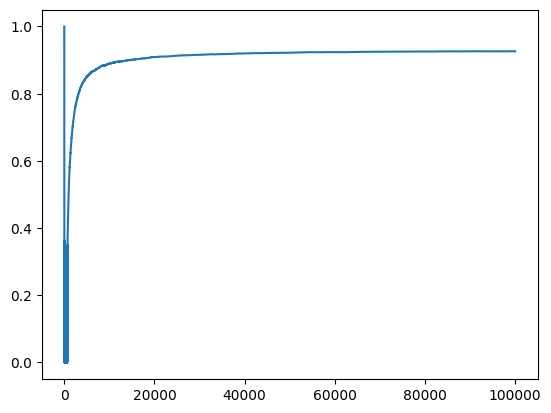

In [6]:
import numpy as np
import matplotlib.pyplot as plt
T = 100000 
N = 10 

true_rewards = np.random.uniform(low=0, high=1, size=N) 
estimated_rewards = np.zeros(N) 
chosen_count = np.zeros(N) 
total_reward = 0 
rewards = []

def calculate_delta(T, item):
    if chosen_count[item] == 0:
        return 1
    else:
        return np.sqrt(2 * np.log(T) / chosen_count[item])

def UCB(t, N):
    upper_bound_probs = [estimated_rewards[item] + calculate_delta(t, item) for item in range(N)]
    item = np.argmax(upper_bound_probs)
    reward = np.random.binomial(n=1, p=true_rewards[item])
    return item, reward

for t in range(1, T): 
   item, reward = UCB(t, N)
   total_reward += reward 
   estimated_rewards[item] = ((t - 1) * estimated_rewards[item] + reward) / t
   chosen_count[item] += 1
   rewards.append(estimated_rewards[item])


plt.plot(rewards)
plt.show